# Data Exploration with Pandas

In [1]:
## setup
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv ("data/adult.csv", na_values="?")

In [3]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


## Edit the data

In [6]:
df2 = df[["age", "sex", "race"]].head()
df2

,age,sex,race
0,39,Male,White
1,50,Male,White
2,38,Male,White
3,53,Male,Black
4,28,Female,Black


### Remove rows

In [10]:
df2

,age,sex,race
0,39,Male,White
1,50,Male,White
2,38,Male,White
4,28,Female,Black


In [9]:
# df2.drop([3], inplace=True, axis=0)
df2.drop([3], axis=0, inplace=True)
df2
# The axis argument is either 0 when it indicates rows and 1 when it is used to drop columns.
#axis : int or axis name. To drop labels from the rows (0 / ‘rows’)

KeyError: '[3] not found in axis'

### Remove columns

In [11]:
df2.drop('age', inplace=True, axis = 1)
df2.head()

# You can set inplace to True to delete the column without having to reassign the DataFrame.
#axis : int or axis name. To drop labels from the columns (1 / ‘columns’)


,sex,race
0,Male,White
1,Male,White
2,Male,White
4,Female,Black


### Append rows

In [14]:
df2 = df[["age", "sex", "race"]].head()
df2

,age,sex,race
0,39,Male,White
1,50,Male,White
2,38,Male,White
3,53,Male,Black
4,28,Female,Black


In [12]:
# Append is deprecated: https://stackoverflow.com/questions/75956209/error-dataframe-object-has-no-attribute-append
# df2.append({"sex": "Male", "race" : "White"}, ignore_index=True)
# Note that here, the index gets filled up, but the new instances is added at the end.
# Append rows to the end of caller, returning a new object.
# ignore_index: If True, do not use the index labels.

In [15]:
df2

,age,sex,race
0,39,Male,White
1,50,Male,White
2,38,Male,White
3,53,Male,Black
4,28,Female,Black


In [16]:
df_with_3_cols = pd.DataFrame([{"sex": "Male", "race" : "White", "age" : 21},
                               {"sex": "Female", "race" : "Asian"}])
df_with_3_cols

,sex,race,age
0,Male,White,21.0
1,Female,Asian,NaN


In [17]:
df2

,age,sex,race
0,39,Male,White
1,50,Male,White
2,38,Male,White
3,53,Male,Black
4,28,Female,Black


In [20]:
df2 = pd.concat([df2, pd.DataFrame([{"sex": "Male", "race" : "Asian", "age" : 76}])], ignore_index = True)

In [21]:
df2

,age,sex,race
0,39.0,Male,White
1,50.0,Male,White
2,38.0,Male,White
3,53.0,Male,Black
4,28.0,Female,Black
5,NaN,Male,Asian
6,76.0,Male,Asian


In [22]:
df_with_3_cols

,sex,race,age
0,Male,White,21.0
1,Female,Asian,NaN


In [23]:
df2 = pd.concat([df2, df_with_3_cols], ignore_index = True)
df2

,age,sex,race
0,39.0,Male,White
1,50.0,Male,White
2,38.0,Male,White
3,53.0,Male,Black
4,28.0,Female,Black
5,NaN,Male,Asian
6,76.0,Male,Asian
7,21.0,Male,White
8,NaN,Female,Asian


### Adding columns

In [25]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [26]:
df["age"].head()

0    39
1    50
2    38
3    53
4    28
Name: age, dtype: int64

In [27]:
decade = df["age"] // 10 * 10
decade.head()
#type(s)

0    30
1    50
2    30
3    50
4    20
Name: age, dtype: int64

In [28]:
df ['age_group'] = decade
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class,age_group
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,30
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,50
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,30
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,50
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,20


In [32]:
is_white_list = []
for i in df['race']:
    if i == 'White':
        is_white_list.append(True)
    else:
        is_white_list.append(False)
        
df['is_white_again'] = is_white_list

In [33]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class,age_group,is_white_again
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,30,True
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,50,True
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,30,True
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,50,False
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,20,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K,30,True
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K,60,False
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K,30,True
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K,40,False


In [39]:
df ["is_white"] = df.race == "White"
df ["is_white_again"] = [True if i == "White" else False for i in df.race]# == "White"
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class,age_group,is_white,is_white_again
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,30,True,True
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,50,True,True
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,30,True,True
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,50,False,False
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,20,False,False


In [34]:
list1 = ["capital-win" for x in df ["capital-gain"] if x > 0]
list2 = ["capital-win" if x > 0 else "no-capital-win" for x in df ["capital-gain"]]
len(list1), len(list2), len(df)

(4035, 48842, 48842)

In [35]:
list1[:5]

['capital-win', 'capital-win', 'capital-win', 'capital-win', 'capital-win']

In [36]:
list2[:5]

['capital-win',
 'no-capital-win',
 'no-capital-win',
 'no-capital-win',
 'no-capital-win']

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      46033 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  47985 non-null  object
 14  class           48842 non-null  object
 15  age_group       48842 non-null  int64 
 16  is_white_again  48842 non-null  bool  
dtypes: bool(1), int64(7), object(9)
memory usage: 6.0+

In [42]:
df ["capital"] = ["capital-win" if x > 0 else "no-capital-win" for x in df["capital-gain"]]
# df ["capital_again"] = ["capital-win" for x in df ["capital-gain"] if x > 0]
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class,age_group,is_white_again,capital
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,30,True,capital-win
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,50,True,no-capital-win
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,30,True,no-capital-win
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,50,False,no-capital-win
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,20,False,no-capital-win


In [43]:
df["capital_status"] = ["capital-win" if win > 0 else "capital-loss" if loss > 0 else "neutral-capital"
                        for win, loss in df[["capital-gain", "capital-loss"]].itertuples(index=False)]

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class,age_group,is_white_again,capital,capital_status
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,30,True,capital-win,capital-win
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,50,True,no-capital-win,neutral-capital
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,30,True,no-capital-win,neutral-capital
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,50,False,no-capital-win,neutral-capital
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,20,False,no-capital-win,neutral-capital


In [49]:
df[df['capital_status'] == 'capital-loss']

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class,age_group,is_white,is_white_again,capital,capital_status
23,43,Private,117037,11th,7,Married-civ-spouse,Transport-moving,Husband,White,Male,0,2042,40,United-States,<=50K,40,True,True,no-capital-win,capital-loss
32,45,Private,386940,Bachelors,13,Divorced,Exec-managerial,Own-child,White,Male,0,1408,40,United-States,<=50K,40,True,True,no-capital-win,capital-loss
52,47,Private,51835,Prof-school,15,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,1902,60,Honduras,>50K,40,True,True,no-capital-win,capital-loss
93,30,Private,117747,HS-grad,9,Married-civ-spouse,Sales,Wife,Asian-Pac-Islander,Female,0,1573,35,NaN,<=50K,30,False,False,no-capital-win,capital-loss
96,48,Self-emp-not-inc,191277,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,1902,60,United-States,>50K,40,True,True,no-capital-win,capital-loss
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48783,19,Private,156618,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,1602,20,United-States,<=50K,10,True,True,no-capital-win,capital-loss
48794,29,Local-gov,170482,HS-grad,9,Married-civ-spouse,Protective-serv,Husband,Black,Male,0,2057,40,United-States,<=50K,20,False,False,no-capital-win,capital-loss
48802,51,Private,29887,Bachelors,13,Divorced,Tech-support,Not-in-family,White,Male,0,1590,40,United-States,<=50K,50,True,True,no-capital-win,capital-loss
48814,39,Private,229647,Bachelors,13,Never-married,Tech-support,Not-in-family,White,Female,0,1669,40,United-States,<=50K,30,True,True,no-capital-win,capital-loss


### The apply function

Apply a function along an axis of the DataFrame. You can use .apply to send a single column to a function. This is useful when cleaning up data - converting formats, altering values etc. (http://jonathansoma.com/lede/foundations/classes/pandas%20columns%20and%20functions/apply-a-function-to-every-row-in-a-pandas-dataframe/)

In [44]:
df2 = df[["age", "sex", "workclass"]]
df2.head(10)

,age,sex,workclass
0,39,Male,State-gov
1,50,Male,Self-emp-not-inc
2,38,Male,Private
3,53,Male,Private
4,28,Female,Private
5,37,Female,Private
6,49,Female,Private
7,52,Male,Self-emp-not-inc
8,31,Female,Private
9,42,Male,Private


In [45]:
df2['workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', nan, 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [46]:
df2['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [54]:
df2

,age,sex,workclass
0,39,Male,State-gov
1,50,Male,Self-emp-not-inc
2,38,Male,Private
3,53,Male,Private
4,28,Female,Private
...,...,...,...
48837,39,Female,Private
48838,64,Male,NaN
48839,38,Male,Private
48840,44,Male,Private


In [55]:
df2.loc[0]

age                 39
sex               Male
workclass    State-gov
Name: 0, dtype: object

In [76]:
df2.loc[0]

age                                39
sex                              Male
workclass                   State-gov
course_workclass             official
my_val_2            Young or official
Name: 0, dtype: object

In [47]:
### We can also use apply on a single column:
def my_function (row):
    if row['workclass'] is np.NaN:
        return "Unknown"
    elif "State" in row['workclass']:
    # elif row['workclass'] == "State-gov":
        return "official"
    else:
        return "other"
    
def my_function2 (row):
    if '3' in str(row['age']):
        return "you're not old enough!"
    else:
        return "other"

In [50]:
df2.loc[1]

age                        50
sex                      Male
workclass    Self-emp-not-inc
Name: 1, dtype: object

In [51]:
my_function2(df2.loc[1])

'other'

In [71]:
my_function(df2.loc[0])

'official'

In [52]:
df2.apply(my_function, axis=1)

0        official
1           other
2           other
3           other
4           other
           ...   
48837       other
48838     Unknown
48839       other
48840       other
48841       other
Length: 48842, dtype: object

In [73]:
#Apply a function along an axis of the DataFrame.
#Objects passed to the function are Series objects whose index
#is either the DataFrame’s index (axis=0) or the DataFrame’s columns (axis=1).

df2["course_workclass"] = df2.apply(my_function, axis=1)
df2.head()

C:\Users\isen1\AppData\Local\Temp\ipykernel_19252\2768217816.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["course_workclass"] = df2.apply(my_function, axis=1)


,age,sex,workclass,course_workclass
0,39,Male,State-gov,official
1,50,Male,Self-emp-not-inc,other
2,38,Male,Private,other
3,53,Male,Private,other
4,28,Female,Private,other


In [75]:
def my_function_2(row):
    if row["workclass"] is np.NaN:
        return "Unknown"
    if (row["age"] < 30) or ("State" in row["workclass"]):
        return "Young or official"
    elif (row["sex"] == "Male"):
        return "Male"
    else:
        return 'Unknown'

df2["my_val_2"] = df2.apply(my_function_2, axis = 1)
df2.head()

C:\Users\isen1\AppData\Local\Temp\ipykernel_19252\4202293559.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["my_val_2"] = df2.apply(my_function_2, axis = 1)


,age,sex,workclass,course_workclass,my_val_2
0,39,Male,State-gov,official,Young or official
1,50,Male,Self-emp-not-inc,other,Male
2,38,Male,Private,other,Male
3,53,Male,Private,other,Male
4,28,Female,Private,other,Young or official


In [81]:
list1 = [1, 2,3 ,4, 5]
sum(list1)/len(list1)

3.0

## Handling missing values

Useful reading: https://jakevdp.github.io/PythonDataScienceHandbook/03.04-missing-values.html

In [93]:
## lets create a small artficial dataset
# missing data representation -- NaN (acronym for Not a Number) is a special floating-point value recognized by all systems that use the standard IEEE floating-point representation
data = [[1, np.nan,3,4], [2, 3,4,np.nan], [np.nan,10,11,12], [4, 14,'b', 16], [5, 1,2,3]]
df2 = pd.DataFrame(data, columns=["i", "c1", "c2", "c3"])
#df2.dtype
df2

,i,c1,c2,c3
0,1.0,NaN,3,4.0
1,2.0,3.0,4,NaN
2,NaN,10.0,11,12.0
3,4.0,14.0,b,16.0
4,5.0,1.0,2,3.0


In [96]:
sum([4, 12, 16, 3]) / 4

8.75

In [97]:
sum([4, 0, 12, 16, 3]) / 5

7.0

In [94]:
df2.c3.sum() / len(df2)

7.0

In [95]:
df2.c3.mean()

8.75

In [98]:
df2

,i,c1,c2,c3
0,1.0,NaN,3,4.0
1,2.0,3.0,4,NaN
2,NaN,10.0,11,12.0
3,4.0,14.0,b,16.0
4,5.0,1.0,2,3.0


In [99]:
df2.dropna()

,i,c1,c2,c3
3,4.0,14.0,b,16.0
4,5.0,1.0,2,3.0


In [101]:
df2

,i,c1,c2,c3
0,1.0,NaN,3,4.0
1,2.0,3.0,4,NaN
2,NaN,10.0,11,12.0
3,4.0,14.0,b,16.0
4,5.0,1.0,2,3.0


In [100]:
df2.dropna(subset=["c3"])

,i,c1,c2,c3
0,1.0,NaN,3,4.0
2,NaN,10.0,11,12.0
3,4.0,14.0,b,16.0
4,5.0,1.0,2,3.0


In [103]:
df2

,i,c1,c2,c3
0,1.0,NaN,3,4.0
1,2.0,3.0,4,NaN
2,NaN,10.0,11,12.0
3,4.0,14.0,b,16.0
4,5.0,1.0,2,3.0


In [102]:
df2.dropna(axis=1)

,c2
0,3
1,4
2,11
3,b
4,2


In [104]:
df2

,i,c1,c2,c3
0,1.0,NaN,3,4.0
1,2.0,3.0,4,NaN
2,NaN,10.0,11,12.0
3,4.0,14.0,b,16.0
4,5.0,1.0,2,3.0


In [108]:
df2

,i,c1,c2,c3
0,1.0,NaN,3,4.0
1,2.0,3.0,4,NaN
2,NaN,10.0,11,12.0
3,4.0,14.0,b,16.0
4,5.0,1.0,2,3.0


In [110]:
df2.c3.fillna(df2.c2)

0     4.0
1     4.0
2    12.0
3    16.0
4     3.0
Name: c3, dtype: float64

In [111]:
df2

,i,c1,c2,c3
0,1.0,NaN,3,4.0
1,2.0,3.0,4,NaN
2,NaN,10.0,11,12.0
3,4.0,14.0,b,16.0
4,5.0,1.0,2,3.0


In [112]:
#{‘backfill’, ‘bfill’, ‘pad’, ‘ffill’, None}, default None
#Method to use for filling holes in reindexed Series
#pad / ffill: propagate last valid observation forward to next valid
#backfill / bfill: use NEXT valid observation to fill gap

df2.fillna(method="ffill")

,i,c1,c2,c3
0,1.0,NaN,3,4.0
1,2.0,3.0,4,4.0
2,2.0,10.0,11,12.0
3,4.0,14.0,b,16.0
4,5.0,1.0,2,3.0


In [ ]:
df2.fillna(method="bfill")

In [ ]:
# Lets go back to our main dataset:
# The count function counts only non-missing values:
df.count()

In [ ]:
len(df) - df.count()

In [ ]:
#show the respective instances:
df [df["workclass"].isnull()]

In [ ]:
df2 = df.dropna()
len(df2)

In [ ]:
len(df)

In [ ]:
df3 = df.fillna('')
df3.loc[20:30]

## Group-by

By “group by” we are referring to a process involving one or more of the following steps:

    - Splitting the data into groups based on some criteria.
    - Applying a function to each group independently.
    - Combining the results into a data structure.

More: https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html

In [53]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class,age_group,is_white_again,capital,capital_status
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,30,True,capital-win,capital-win
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,50,True,no-capital-win,neutral-capital
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,30,True,no-capital-win,neutral-capital
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,50,False,no-capital-win,neutral-capital
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,20,False,no-capital-win,neutral-capital


In [54]:
df.head().groupby(["sex"])

In [55]:
for name, group in df.head().groupby(["sex"]):
    print (name)
    print (group)
    print (type(group))
    print('--------------------------------------------------------------')

Female
   age workclass  fnlwgt  education  education-num      marital-status  \
4   28   Private  338409  Bachelors             13  Married-civ-spouse   

       occupation relationship   race     sex  capital-gain  capital-loss  \
4  Prof-specialty         Wife  Black  Female             0             0   

   hours-per-week native-country  class  age_group  is_white_again  \
4              40           Cuba  <=50K         20           False   

          capital   capital_status  
4  no-capital-win  neutral-capital  
<class 'pandas.core.frame.DataFrame'>
--------------------------------------------------------------
Male
   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   

       marital-status         occupation   relationship  

C:\Users\isen1\AppData\Local\Temp\ipykernel_21748\229845583.py:1: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for name, group in df.head().groupby(["sex"]):


In [56]:
number_df = df[['sex', 'age', 'education-num', 'capital-gain']]

In [57]:
g = number_df.groupby(["sex"])
g.size()

sex
Female    16192
Male      32650
dtype: int64

In [119]:
g.size().sum()

48842

In [120]:
df["sex"].value_counts()

sex
Male      32650
Female    16192
Name: count, dtype: int64

In [122]:
g.mean()#["age"]

,age,education-num,capital-gain
sex,,,
Female,36.927989,10.044034,580.726285
Male,39.494395,10.094977,1326.208300


In [58]:
g.mean().loc["Male"]

age                39.494395
education-num      10.094977
capital-gain     1326.208300
Name: Male, dtype: float64

In [60]:
g.mean().iloc[1]

age                39.494395
education-num      10.094977
capital-gain     1326.208300
Name: Male, dtype: float64

We can also group by multiple attributes:

In [63]:
number_df = df[['sex', 'race', 'age', 'education-num', 'capital-gain']]
g = number_df.groupby(["sex","race"]).mean()
print(g.to_latex())

\begin{tabular}{llrrr}
\toprule
     &       &        age &  education-num &  capital-gain \\
sex & race &            &                &               \\
\midrule
Female & Amer-Indian-Eskimo &  36.237838 &       9.686486 &    380.621622 \\
     & Asian-Pac-Islander &  35.657640 &      10.497099 &    587.135397 \\
     & Black &  37.905979 &       9.591854 &    492.951906 \\
     & Other &  31.212903 &       9.038710 &    920.922581 \\
     & White &  36.882935 &      10.123206 &    594.816919 \\
Male & Amer-Indian-Eskimo &  36.989474 &       9.192982 &    641.768421 \\
     & Asian-Pac-Islander &  38.994012 &      11.257485 &   2027.503992 \\
     & Black &  37.922592 &       9.393353 &    680.668069 \\
     & Other &  35.167331 &       8.717131 &   1021.697211 \\
     & White &  39.704507 &      10.133461 &   1364.602192 \\
\bottomrule
\end{tabular}



C:\Users\isen1\AppData\Local\Temp\ipykernel_21748\3946748753.py:3: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(g.to_latex())


In [64]:
g.loc["Male"]

,age,education-num,capital-gain
race,,,
Amer-Indian-Eskimo,36.989474,9.192982,641.768421
Asian-Pac-Islander,38.994012,11.257485,2027.503992
Black,37.922592,9.393353,680.668069
Other,35.167331,8.717131,1021.697211
White,39.704507,10.133461,1364.602192


In [65]:
g.loc["Male"].loc["White"]

age                39.704507
education-num      10.133461
capital-gain     1364.602192
Name: White, dtype: float64

In [66]:
g = df.groupby(["sex","race", "education"]).size()
g

sex     race                education   
Female  Amer-Indian-Eskimo  10th              10
                            11th               7
                            1st-4th            2
                            7th-8th            3
                            9th                3
                                            ... 
Male    White               HS-grad         9361
                            Masters         1613
                            Preschool         44
                            Prof-school      637
                            Some-college    5889
Length: 155, dtype: int64

In [67]:
g.unstack()

education                   10th   11th   12th  1st-4th  5th-6th  7th-8th  \
sex    race                                                                 
Female Amer-Indian-Eskimo   10.0    7.0    NaN      2.0      NaN      3.0   
       Asian-Pac-Islander    7.0   12.0    6.0      4.0     15.0      5.0   
       Black                87.0  127.0   41.0     10.0     12.0     39.0   
       Other                 6.0   10.0    5.0      3.0      6.0     10.0   
       White               347.0  494.0  159.0     42.0     94.0    182.0   
Male   Amer-Indian-Eskimo   12.0   19.0    5.0      2.0      2.0      7.0   
       Asian-Pac-Islander    9.0   15.0    9.0      6.0     13.0      9.0   
       Black                95.0  125.0   64.0     14.0     29.0     51.0   
       Other                 5.0   12.0   12.0     10.0     17.0     13.0   
       White               811.0  991.0  356.0    154.0    321.0    636.0   

education                    9th  Assoc-acdm  Assoc-voc  Bachelors  Doctorate  \
sex    race                                                                     
Female Amer-Indian-Eskimo    3.0         8.0       18.0       12.0        2.0   
       Asian-Pac-Islander    6.0        21.0       15.0      145.0        NaN   
       Black                42.0        95.0       95.0      248.0        7.0   
       Other                 6.0         4.0        3.0       21.0        NaN   
       White               163.0       499.0      603.0     2051.0      104.0   
Male   Amer-Indian-Eskimo    6.0         5.0       13.0       17.0        1.0   
       Asian-Pac-Islander    4.0        28.0       38.0      263.0       46.0   
       Black                69.0        66.0       70.0      256.0        9.0   
       Other                 9.0         6.0        6.0       29.0        3.0   
       White               448.0       869.0     1200.0     4983.0      422.0   

education                  HS-grad  HS-jupytgrad  Masters  Preschool  \
sex    race                                                            
Female Amer-Indian-Eskimo     59.0           NaN      6.0        NaN   
       Asian-Pac-Islander    122.0           NaN     33.0        3.0   
       Black                 858.0           NaN     65.0        4.0   
       Other                  32.0           NaN      6.0        NaN   
       White                4025.0           1.0    735.0       17.0   
Male   Amer-Indian-Eskimo    117.0           NaN      7.0        1.0   
       Asian-Pac-Islander    214.0           NaN    107.0        4.0   
       Black                 922.0           NaN     78.0        8.0   
       Other                  73.0           NaN      7.0        2.0   
       White                9361.0           NaN   1613.0       44.0   

education                  Prof-school  Some-college  
sex    race                                           
Female Amer-Indian-Eskimo          1.0          54.0  
       Asian-Pac-Islander         11.0         112.0  
       Black                       8.0         570.0  
       Other                       1.0          42.0  
       White                     111.0        3400.0  
Male   Amer-Indian-Eskimo          1.0          70.0  
       Asian-Pac-Islander         47.0         190.0  
       Black                      13.0         508.0  
       Other                       4.0          43.0  
       White                     637.0        5889.0

In [131]:
#  Pivot a level of the (necessarily hierarchical) index labels,
# returning a DataFrame having a new level of column labels whose
#inner-most level consists of the pivoted index labels.

print(g.unstack().to_markdown())

|                                  |   10th |   11th |   12th |   1st-4th |   5th-6th |   7th-8th |   9th |   Assoc-acdm |   Assoc-voc |   Bachelors |   Doctorate |   HS-grad |   HS-jupytgrad |   Masters |   Preschool |   Prof-school |   Some-college |
|:---------------------------------|-------:|-------:|-------:|----------:|----------:|----------:|------:|-------------:|------------:|------------:|------------:|----------:|---------------:|----------:|------------:|--------------:|---------------:|
| ('Female', 'Amer-Indian-Eskimo') |     10 |      7 |    nan |         2 |       nan |         3 |     3 |            8 |          18 |          12 |           2 |        59 |            nan |         6 |         nan |             1 |             54 |
| ('Female', 'Asian-Pac-Islander') |      7 |     12 |      6 |         4 |        15 |         5 |     6 |           21 |          15 |         145 |         nan |       122 |            nan |        33 |           3 |            11 |      

In [ ]:
g.unstack (["race","sex"])

## Ex 1

Use Census data, aka, adult.csv

A. Show for each combination of sex and race, how many instances(people) are contained in the dataset

B. What is the mean age of men and women in this dataset?

C. Show for each combination of marital-Status and race, how many males/females over 40 years have a bachelor degree as their highest degree?

In [142]:
print("A Use Census data")


df = pd.read_csv ("data/adult.csv", na_values="?")
df.head()

print("A. Show for each combination of sex and race, how many instances(people) are contained in the dataset")

df.groupby(['sex', 'race']).size().unstack()

print("B. What is the mean age of men and women in this dataset?")

g = df[['sex','age']].groupby('sex')
g.mean()['age']

print("C. Show for each combination of marital-Status and race how many males/females over 40 years have a bachelor degree as their highest degree?")

df = df[(df['age']>40) & (df['education'] == 'Bachelors')].groupby(['marital-status', 'race', 'sex']).size().unstack().fillna(0)
df


A Use Census data
A. Show for each combination of sex and race, how many instances(people) are contained in the dataset
B. What is the mean age of men and women in this dataset?
C. Show for each combination of marital-Status and race how many males/females over 40 years have a bachelor degree as their highest degree?


sex                                       Female    Male
marital-status        race                              
Divorced              Amer-Indian-Eskimo     0.0     2.0
                      Asian-Pac-Islander     7.0     4.0
                      Black                 34.0    20.0
                      Other                  2.0     2.0
                      White                253.0   215.0
Married-civ-spouse    Amer-Indian-Eskimo     2.0     3.0
                      Asian-Pac-Islander    17.0    92.0
                      Black                 16.0    70.0
                      Other                  0.0     6.0
                      White                131.0  1852.0
Married-spouse-absent Amer-Indian-Eskimo     0.0     1.0
                      Asian-Pac-Islander     3.0     3.0
                      Black                  3.0     2.0
                      White                 20.0    14.0
Never-married         Amer-Indian-Eskimo     1.0     0.0
                      Asian-Pac-Islander     9.0     4.0
                      Black                 18.0    13.0
                      White                113.0   153.0
Separated             Asian-Pac-Islander     2.0     0.0
                      Black                 10.0     2.0
                      Other                  1.0     0.0
                      White                 29.0    29.0
Widowed               Amer-Indian-Eskimo     3.0     0.0
                      Asian-Pac-Islander     4.0     3.0
                      Black                  5.0     1.0
                      Other                  1.0     0.0
                      White                 66.0    24.0

In [ ]:
print("A Use Census data")


df = pd.read_csv ("data/adult.csv", na_values="?")
df.head()

print("A. Show for each combination of sex and race, how many instances(people) are contained in the dataset")


df.groupby(["sex", "race"]).size().unstack()

print("B. What is the mean age of men and women in this dataset?")


g = df[['sex', 'age']].groupby("sex")
g.mean()["age"]

print("C. Show for each combination of marital-Status and race how many males/females over 40 years have a bachelor degree as their highest degree?")


df2 = df[(df["age"] > 40) & (df["education"] =="Bachelors")]
df2.groupby(["marital-status","race","sex"]).size().unstack().fillna(0)

## Concatenate and join

There several methods to bring data from different dataset together, most importantly *concat* and *merge*

In [143]:
df1 = pd.DataFrame ([["Student 1", 2.0, 1.5],
                     ["Student 2", 3.0, 2.5],
                     ["Student 3", 1.5, 2.0],
                     ["Student 4", 1.0, 4.0]],columns = ["Student", "course_A", "course_B"])
df1

,Student,course_A,course_B
0,Student 1,2.0,1.5
1,Student 2,3.0,2.5
2,Student 3,1.5,2.0
3,Student 4,1.0,4.0


In [144]:
df2 = pd.DataFrame ([["Student 5", 2.3, 2.5],
                     ["Student 6", 3.0, 1.0],
                     ["Student 7", 2.5, 2.0],
                     ["Student 8", 1.7, 3.5]],columns = ["Student", "course_A", "course_B"])
df2

,Student,course_A,course_B
0,Student 5,2.3,2.5
1,Student 6,3.0,1.0
2,Student 7,2.5,2.0
3,Student 8,1.7,3.5


In [145]:
df_all = pd.concat ([df1,df2])
df_all

,Student,course_A,course_B
0,Student 1,2.0,1.5
1,Student 2,3.0,2.5
2,Student 3,1.5,2.0
3,Student 4,1.0,4.0
0,Student 5,2.3,2.5
1,Student 6,3.0,1.0
2,Student 7,2.5,2.0
3,Student 8,1.7,3.5


In [146]:
df_all.reset_index(drop=True,inplace=True)
df_all

,Student,course_A,course_B
0,Student 1,2.0,1.5
1,Student 2,3.0,2.5
2,Student 3,1.5,2.0
3,Student 4,1.0,4.0
4,Student 5,2.3,2.5
5,Student 6,3.0,1.0
6,Student 7,2.5,2.0
7,Student 8,1.7,3.5


In [147]:
df_ab = pd.concat([df1, df2], ignore_index=True)
df_ab

,Student,course_A,course_B
0,Student 1,2.0,1.5
1,Student 2,3.0,2.5
2,Student 3,1.5,2.0
3,Student 4,1.0,4.0
4,Student 5,2.3,2.5
5,Student 6,3.0,1.0
6,Student 7,2.5,2.0
7,Student 8,1.7,3.5


In [148]:
df3 = pd.DataFrame ([["Student 1", 1.3],
                     ["Student 2", 2.3],
                     ["Student 5", 4.0],
                     ["Student 8", 1.5],
                     ["Student 10", 1.5]
                    ],columns = ["Student", "course_C"])
df3

,Student,course_C
0,Student 1,1.3
1,Student 2,2.3
2,Student 5,4.0
3,Student 8,1.5
4,Student 10,1.5


In [150]:
df_ab

,Student,course_A,course_B
0,Student 1,2.0,1.5
1,Student 2,3.0,2.5
2,Student 3,1.5,2.0
3,Student 4,1.0,4.0
4,Student 5,2.3,2.5
5,Student 6,3.0,1.0
6,Student 7,2.5,2.0
7,Student 8,1.7,3.5


In [151]:
# by default, inner join is performed.
# use intersection of keys from both frames, similar to a SQL inner join;
# preserve the order of the left keys.

pd.merge (df_ab, df3, on="Student") #, how="inner"

,Student,course_A,course_B,course_C
0,Student 1,2.0,1.5,1.3
1,Student 2,3.0,2.5,2.3
2,Student 5,2.3,2.5,4.0
3,Student 8,1.7,3.5,1.5


This is called an "inner" join: only those rows occur that are present in both tables.


In [152]:
#"Outer Join"
# use union of keys from both frames, similar to a SQL full outer join; sort keys lexicographically.
pd.merge (df_ab, df3, on="Student", how="outer")

,Student,course_A,course_B,course_C
0,Student 1,2.0,1.5,1.3
1,Student 2,3.0,2.5,2.3
2,Student 3,1.5,2.0,NaN
3,Student 4,1.0,4.0,NaN
4,Student 5,2.3,2.5,4.0
5,Student 6,3.0,1.0,NaN
6,Student 7,2.5,2.0,NaN
7,Student 8,1.7,3.5,1.5
8,Student 10,NaN,NaN,1.5


In [154]:
df_ab

,Student,course_A,course_B
0,Student 1,2.0,1.5
1,Student 2,3.0,2.5
2,Student 3,1.5,2.0
3,Student 4,1.0,4.0
4,Student 5,2.3,2.5
5,Student 6,3.0,1.0
6,Student 7,2.5,2.0
7,Student 8,1.7,3.5


In [153]:
#"Left Join"
# use only keys from left frame, similar to a SQL left outer join; preserve key order.
pd.merge (df_ab, df3, on="Student", how="left")

,Student,course_A,course_B,course_C
0,Student 1,2.0,1.5,1.3
1,Student 2,3.0,2.5,2.3
2,Student 3,1.5,2.0,NaN
3,Student 4,1.0,4.0,NaN
4,Student 5,2.3,2.5,4.0
5,Student 6,3.0,1.0,NaN
6,Student 7,2.5,2.0,NaN
7,Student 8,1.7,3.5,1.5


In [156]:
pd.merge (df3, df_ab, on="Student", how="right")

,Student,course_C,course_A,course_B
0,Student 1,1.3,2.0,1.5
1,Student 2,2.3,3.0,2.5
2,Student 3,NaN,1.5,2.0
3,Student 4,NaN,1.0,4.0
4,Student 5,4.0,2.3,2.5
5,Student 6,NaN,3.0,1.0
6,Student 7,NaN,2.5,2.0
7,Student 8,1.5,1.7,3.5


In [157]:
# Left and right key do not need to have the same column name
# left: use only keys from left frame, similar to a SQL left outer join; preserve key order.
# right: use only keys from right frame, similar to a SQL right outer join; preserve key order.
df4 = pd.DataFrame ([["Student 1", 1.3],
                     ["Student 2", 2.3],
                     ["Student 5", 4.0],
                     ["Student 6", 1.5],
                     ["Student 12", 1.5]
                    ],columns = ["Student_name", "course_D"])
df4

,Student_name,course_D
0,Student 1,1.3
1,Student 2,2.3
2,Student 5,4.0
3,Student 6,1.5
4,Student 12,1.5


In [158]:
df_ab

,Student,course_A,course_B
0,Student 1,2.0,1.5
1,Student 2,3.0,2.5
2,Student 3,1.5,2.0
3,Student 4,1.0,4.0
4,Student 5,2.3,2.5
5,Student 6,3.0,1.0
6,Student 7,2.5,2.0
7,Student 8,1.7,3.5


In [160]:
df_abd = pd.merge (df_ab, df4, left_on="Student", right_on="Student_name", how="outer")
df_abd

,Student,course_A,course_B,Student_name,course_D
0,Student 1,2.0,1.5,Student 1,1.3
1,Student 2,3.0,2.5,Student 2,2.3
2,Student 3,1.5,2.0,NaN,NaN
3,Student 4,1.0,4.0,NaN,NaN
4,Student 5,2.3,2.5,Student 5,4.0
5,Student 6,3.0,1.0,Student 6,1.5
6,Student 7,2.5,2.0,NaN,NaN
7,Student 8,1.7,3.5,NaN,NaN
8,NaN,NaN,NaN,Student 12,1.5


In [ ]:
df_abd["Student"] = df_abd["Student"].fillna(df_abd["Student_name"])
df_abd

In [ ]:
df_abd.drop("Student_name", axis=1)

In [ ]:
# There can be more occurrences of a student in a table; then ALL combinations are formed.
df5 = pd.DataFrame ([["Student 1", 1.3],
                     ["Student 1", 2.3],
                     ["Student 2", 4.0],
                     ["Student 2", 1.5],
                     ["Student 2", 3.5]
                    ],columns = ["Student", "course_E"])
df5

In [ ]:
df1

In [ ]:
df_abe = pd.merge(df1,df5,how = "outer")
df_abe

In [ ]:
df_abe = df_abe.sort_values(["Student", "course_E"])
df_abe

In [ ]:
df_abe.drop_duplicates("Student")

#keep : {‘first’, ‘last’, False}, default ‘first’
#first : Drop duplicates except for the first occurrence. (default)
#last : Drop duplicates except for the last occurrence.
#False : Drop all duplicates.

## Working with specific data types

### String objects

In [165]:
df.head()
df = pd.read_csv('data/adult.csv')
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
48838,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [166]:
df ['marital-status'].unique()

array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], dtype=object)

In [167]:
df ['marital-status'].value_counts()

marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64

In [168]:
# Select those with a specific value
df [df ['marital-status'] == "Never-married"].head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
12,23,Private,122272,Bachelors,13,Never-married,Adm-clerical,Own-child,White,Female,0,0,30,United-States,<=50K
13,32,Private,205019,Assoc-acdm,12,Never-married,Sales,Not-in-family,Black,Male,0,0,50,United-States,<=50K
16,25,Self-emp-not-inc,176756,HS-grad,9,Never-married,Farming-fishing,Own-child,White,Male,0,0,35,United-States,<=50K


In [169]:
# Try and select rows, in which the marital-status string begins with a certain value

df ['marital-status'].str.startswith ("Married")

0        False
1         True
2        False
3         True
4         True
         ...  
48837    False
48838    False
48839     True
48840    False
48841     True
Name: marital-status, Length: 48842, dtype: bool

In [170]:
df [df ['marital-status'].str.startswith ("Married")]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48831,48,Private,285570,HS-grad,9,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,<=50K
48832,61,Private,89686,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,48,United-States,<=50K
48833,31,Private,440129,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K


### Time objects

In [171]:
df = pd.read_csv ("data/weather.csv")

In [172]:
df.head()

,time,temperature,status
0,2017-08-31 11:00:00,15,rainy
1,2017-08-31 23:00:00,8,rainy
2,2017-09-01 11:00:00,19,rainy
3,2017-09-01 23:00:00,9,rainy
4,2017-09-02 11:00:00,21,cloudy


In [173]:
df.dtypes

time           object
temperature     int64
status         object
dtype: object

In [174]:
df["time"].head()

0    2017-08-31 11:00:00
1    2017-08-31 23:00:00
2    2017-09-01 11:00:00
3    2017-09-01 23:00:00
4    2017-09-02 11:00:00
Name: time, dtype: object

In [175]:
df['time'][0]

'2017-08-31 11:00:00'

In [176]:
df["time"] = pd.to_datetime(df.time)
df.head()

,time,temperature,status
0,2017-08-31 11:00:00,15,rainy
1,2017-08-31 23:00:00,8,rainy
2,2017-09-01 11:00:00,19,rainy
3,2017-09-01 23:00:00,9,rainy
4,2017-09-02 11:00:00,21,cloudy


In [177]:
df['time'][0]

Timestamp('2017-08-31 11:00:00')

In [178]:
df.dtypes

time           datetime64[ns]
temperature             int64
status                 object
dtype: object

In [179]:
type(df.time)

pandas.core.series.Series

In [182]:
df["weekday"] = df['time'].dt.day_name()
df.head()

,time,temperature,status,weekday
0,2017-08-31 11:00:00,15,rainy,Thursday
1,2017-08-31 23:00:00,8,rainy,Thursday
2,2017-09-01 11:00:00,19,rainy,Friday
3,2017-09-01 23:00:00,9,rainy,Friday
4,2017-09-02 11:00:00,21,cloudy,Saturday


In [183]:
df["hours"] = df.time.dt.hour
df.head()

,time,temperature,status,weekday,hours
0,2017-08-31 11:00:00,15,rainy,Thursday,11
1,2017-08-31 23:00:00,8,rainy,Thursday,23
2,2017-09-01 11:00:00,19,rainy,Friday,11
3,2017-09-01 23:00:00,9,rainy,Friday,23
4,2017-09-02 11:00:00,21,cloudy,Saturday,11


In [184]:
df["time_from_last_measurement"] = df.time.diff()
df.head()

,time,temperature,status,weekday,hours,time_from_last_measurement
0,2017-08-31 11:00:00,15,rainy,Thursday,11,NaT
1,2017-08-31 23:00:00,8,rainy,Thursday,23,0 days 12:00:00
2,2017-09-01 11:00:00,19,rainy,Friday,11,0 days 12:00:00
3,2017-09-01 23:00:00,9,rainy,Friday,23,0 days 12:00:00
4,2017-09-02 11:00:00,21,cloudy,Saturday,11,0 days 12:00:00


In [185]:
df["reformatted_date"] = df.time.dt.strftime("%y-%m-%d")
df

,time,temperature,status,weekday,hours,time_from_last_measurement,reformatted_date
0,2017-08-31 11:00:00,15,rainy,Thursday,11,NaT,17-08-31
1,2017-08-31 23:00:00,8,rainy,Thursday,23,0 days 12:00:00,17-08-31
2,2017-09-01 11:00:00,19,rainy,Friday,11,0 days 12:00:00,17-09-01
3,2017-09-01 23:00:00,9,rainy,Friday,23,0 days 12:00:00,17-09-01
4,2017-09-02 11:00:00,21,cloudy,Saturday,11,0 days 12:00:00,17-09-02
5,2017-09-03 11:00:00,21,cloudy,Sunday,11,1 days 00:00:00,17-09-03
6,2017-09-04 11:00:00,22,sunny,Monday,11,1 days 00:00:00,17-09-04
7,2017-09-04 23:00:00,12,sunny,Monday,23,0 days 12:00:00,17-09-04
8,2017-09-05 11:00:00,24,sunny,Tuesday,11,0 days 12:00:00,17-09-05
9,2017-09-05 23:00:00,13,sunny,Tuesday,23,0 days 12:00:00,17-09-05


In [ ]:
df.dtypes

## Data export

In [ ]:
# for storing / reloading for later: use pickle
import pickle
pickle.dump(df, open("my_df.p", "wb" ))

In [ ]:
df_loaded = pickle.load(open("my_df.p", "rb" ))
df_loaded.head()

In [187]:
df_exp = df[df.hours == 11]
df_exp = df[["reformatted_date", "weekday", "status", "temperature"]]
df_exp.head()

,reformatted_date,weekday,status,temperature
0,17-08-31,Thursday,rainy,15
1,17-08-31,Thursday,rainy,8
2,17-09-01,Friday,rainy,19
3,17-09-01,Friday,rainy,9
4,17-09-02,Saturday,cloudy,21


In [189]:
df

,time,temperature,status,weekday,hours,time_from_last_measurement,reformatted_date
0,2017-08-31 11:00:00,15,rainy,Thursday,11,NaT,17-08-31
1,2017-08-31 23:00:00,8,rainy,Thursday,23,0 days 12:00:00,17-08-31
2,2017-09-01 11:00:00,19,rainy,Friday,11,0 days 12:00:00,17-09-01
3,2017-09-01 23:00:00,9,rainy,Friday,23,0 days 12:00:00,17-09-01
4,2017-09-02 11:00:00,21,cloudy,Saturday,11,0 days 12:00:00,17-09-02
5,2017-09-03 11:00:00,21,cloudy,Sunday,11,1 days 00:00:00,17-09-03
6,2017-09-04 11:00:00,22,sunny,Monday,11,1 days 00:00:00,17-09-04
7,2017-09-04 23:00:00,12,sunny,Monday,23,0 days 12:00:00,17-09-04
8,2017-09-05 11:00:00,24,sunny,Tuesday,11,0 days 12:00:00,17-09-05
9,2017-09-05 23:00:00,13,sunny,Tuesday,23,0 days 12:00:00,17-09-05


In [191]:
df.to_csv("data/weather_export_extra.csv")
# df.to_csv('weather_export.csv', sep='\t', encoding='utf-8')

In [192]:
df_exp.to_html("weather_export.html")

In [ ]:
df_exp.to_latex()

## Styling

In [ ]:
df = pd.DataFrame(np.random.randint(0,100,size=(10, 4)), columns=list('ABCD'))

In [ ]:
df

In [ ]:
df.style.background_gradient()

In [ ]:
df.style.highlight_max()

In [ ]:
df.style.set_properties(**{'background-color': 'black',
                           'color': 'lawngreen',
                           'border-color': 'white'})

In [198]:
pd?

Object `pd.join` not found.


## Transpose


In [ ]:
h=df.head(5)
h

In [ ]:
h.T

In [ ]:
h.loc[3]

In [ ]:
h.T[3]

## OPTIONAL

In [ ]:
df = pd.read_csv('data/adult.csv')

In [ ]:
df2 = df[["age", "sex", "workclass"]]
df2.head(10)

In [ ]:
### Apply is also often used in combination with a lambda function:
df2["my_val_3"] = df2.apply (lambda x: "Young" if x.age < 30 else x.sex, axis=1)
df2.head(20)

In [ ]:
df[df ['marital-status'].str.match("Married-(.*)-spouse")].sample(4)

### Plotting with Pandas 

Pandas also has plotting functions directly integrated. These are basically shortcuts to matplotlib

In [90]:
import pandas as pd

df = pd.read_csv ("data/adult.csv", na_values="?")
h = df.head(100)
h

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


Let us get the number of males and females

In [ ]:
df.sex.value_counts()

Now lets try to use Pandas plotting functionality. Its call plot(). 
We can specify different "kind" in plot() -- ‘line’ : line plot (default); ‘bar’ : vertical bar plot; ‘barh’ : horizontal bar plot; 
‘hist’ : histogram; ‘pie’ : pie plot; ‘scatter’ : scatter plot


Lets start by creating bar plot for the number of males and females.

## Bar

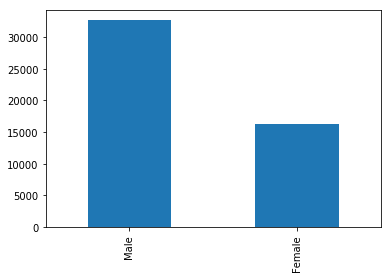

In [93]:
df.sex.value_counts().plot(kind="bar")

What if we want to plot the densities instead of counts.

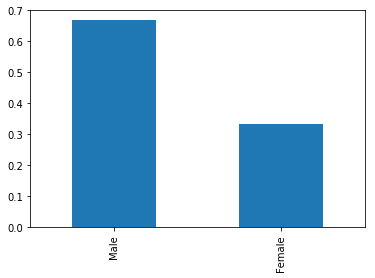

In [94]:
(df.sex.value_counts() / len(df)).plot(kind="bar")

## Histogram

Now lets try to plot the histogram of the ages.

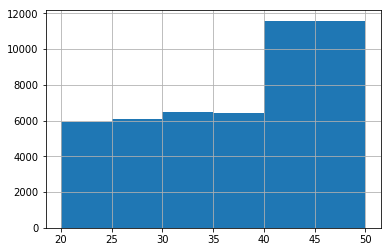

In [96]:
df["age"].hist(bins=[20,25,30,35,40,50])

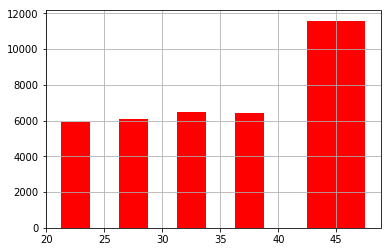

In [98]:
# since its a shortcut to matplotlib, we can just add matplotlib parameters
df["age"].hist(bins=[20, 25,30,35,40,50], rwidth=0.5, color="red")

## Scatter

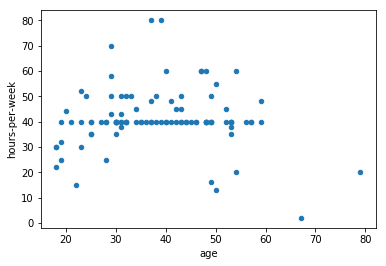

In [100]:
h.plot(x="age", y="hours-per-week", kind="scatter")

# Seaborn

Seaborn is another visualization library built on top of matplotlib and pandas. It offers new styles, simple creation of more standardized plots and easy acces from pandas


In [ ]:
import seaborn as sns

In [ ]:
sns.factorplot(x="sex", y="age", data=df)

In [ ]:
sns.factorplot(x="race", y="age", hue="sex", data=df, kind="bar")

In [ ]:
sns.factorplot(x="race", y="age", hue="sex", data=df, kind="bar",  aspect=3)

In [ ]:
sns.regplot ("age", "hours-per-week", data=df.head(1000))

In [ ]:
sns.distplot(df.age, bins=20)

In [ ]:
c = df.corr()
c

In [ ]:
sns.heatmap(c)

In [ ]:
plt.figure(figsize=(10,5))
g = sns.lmplot(x="age", y="hours-per-week", hue="sex",
               truncate=True, size=5, data=h)

In [ ]:
sns.jointplot(df.age, df["education-num"], kind="kde", color="#4CB391")

In [ ]:
sns.pairplot(data=df.sample(1000), hue="sex")

In [ ]:
f = plt.figure()
plt.gca().plot(x,y)

In [ ]:
f.suptitle("Hallo")
f

## More material:

* The official pandas documentation: https://pandas.pydata.org/
* A tutorial by Brandon Rhodes from PyCon 2015:
https://www.youtube.com/watch?v=5JnMutdy6Fw
 with material and exercises
https://github.com/brandon-rhodes/pycon-pandas-tutorial

* Daniel Chan: Introduction to pandas: https://www.youtube.com/watch?v=dye7rDktJ2E